In [277]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

'2019-02-04 10:26:15.134541'

In [278]:
canadian_rivers = pd.DataFrame({})

for dirpath, dirnames, filenames in os.walk("../Loadings Canada Chloride/Rivers/."):
    for filename in [f for f in filenames if f.endswith(".csv") and f.startswith("Flow")]:
        river = pd.read_csv(os.path.join(dirpath, filename))
        river[river.columns[0]] = pd.to_datetime(river[river.columns[0]], errors='coerce')
        river[filename[5:-8]] = river['Flow, CFS']*0.0283168
        river.set_index(river.columns[0], inplace=True)
        river = river[filename[5:-8]]
        canadian_rivers = canadian_rivers.join(river, how='outer')

In [279]:
us_rivers = pd.DataFrame({})

for dirpath, dirnames, filenames in os.walk("../Loadings US Chloride/Rivers/."):
    for filename in [f for f in filenames if f.endswith(".csv") and f.startswith("Flow")]:
        river = pd.read_csv(os.path.join(dirpath, filename))
        river[river.columns[0]] = pd.to_datetime(river[river.columns[0]], errors='coerce')
        river[filename[5:-8]] = river['Flow, CFS']*0.0283168
        river.set_index(river.columns[0], inplace=True)
        river = river[filename[5:-8]]
        us_rivers = us_rivers.join(river, how='outer')



In [280]:
rivers = {'ca': {'clair': ['Thames_R', 'Sydenham_R', 'Ruscom_R'],
                'eastern': ['Grand_R', 'Nanticoke_R', 'Lynn_R', 'Big_R'],
                'central': ['Big_Otter_R', 'Kettle_R'],
                'western': ['Turkey_R', 'Canard_R']},
          'us': {'clair': ['Clinton_R', 'Belle_R', 'Black_R_MI'], 
                 'eastern': ['Cattaraugus_R', 'Buffalo_R'],
                'central': ['Sandusky_R', 'Black_OH_R', 'Vermilion_R', 'Black_OH_R', 'Rocky_R', 'Cuyahoga_R', 
                            'Chagrin_R', 'Grand_OH_R', 'Conneaut_R'],
                'western': ['Rouge_R', 'Huron_MI_R', 'Raisin_R', 'Maumee_R', 'Portage_R']}}

In [281]:
sorted(canadian_rivers.columns)

['Big_Otter_R',
 'Big_R',
 'Canard_R',
 'Grand_R',
 'Kettle_R',
 'Lynn_R',
 'Nanticoke_R',
 'Niagara_R',
 'Ruscom_R',
 'St_Clair_R',
 'Sydenham_R',
 'Thames_R',
 'Turkey_R']

In [282]:
sorted(us_rivers.columns)

['Belle_R',
 'Black_OH_R',
 'Black_R_MI',
 'Buffalo_R',
 'Cattaraugus_R',
 'Chagrin_R',
 'Clinton_R',
 'Conneaut_R',
 'Cuyahoga_R',
 'Detroit_R',
 'Grand_OH_R',
 'Huron_MI_R',
 'Huron_OH_R',
 'Maumee_R',
 'Portage_R',
 'Raisin_R',
 'Rocky_R',
 'Rouge_R',
 'Sandusky_R',
 'Vermilion_R']

In [283]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
#     cumsum_vec = np.cumsum(np.insert(interval, 0, 0)) 
#     return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

In [284]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600


In [285]:
pd.read_csv('../../measurements/NOAA/summary_eri.csv', skiprows=7).columns

Index(['Date      ', 'OvrLkRunof', 'OvrLkPrecp', ' Evaporatn', 'NetBsnSupl',
       'OvrLdRunof', 'OvrLdPrecp', 'OvrLkATMin', 'OvrLkATMax', 'OvrLkATAvg',
       'OvrLkDewpt', 'OvrLkWndSp', 'OvrLkCloud', 'OvrLdATMin', 'OvrLdATMax',
       'OvrLdATAvg', 'OvrLdDewpt', 'OvrLdWndSp', 'OvrLdCloud', 'UprSoilMst',
       'LwrSoilMst', 'GroundWatr', 'SurfaceSto', 'SnowWatrEq', ' WaterTemp',
       '   IceArea', '  IceDepth', '   IceTemp', 'ReflectRad', ' LatentRad',
       'SensiblRad', ' Advection', 'IncidntRad', '  NetLWRad', ' TotalHeat'],
      dtype='object')

In [286]:
noaa_tim = pd.read_csv('../../measurements/NOAA/summary_eri.csv', skiprows=7)
noaa_tim = noaa_tim.drop(noaa_tim.index[0])

noaa_tim['Date      '] = pd.to_datetime(noaa_tim['Date      '], errors='coerce')
noaa_tim = noaa_tim.set_index('Date      ')

noaa_tim['OvrLkRunof'] = pd.to_numeric(noaa_tim['OvrLkRunof'], errors='coerce')
noaa_tim['OvrLkPrecp'] = pd.to_numeric(noaa_tim['OvrLkPrecp'], errors='coerce')
noaa_tim[' Evaporatn'] = pd.to_numeric(noaa_tim[' Evaporatn'], errors='coerce')
noaa_tim['OvrLkATAvg'] = pd.to_numeric(noaa_tim['OvrLkATAvg'], errors='coerce')
noaa_tim['OvrLdRunof'] = pd.to_numeric(noaa_tim['OvrLdRunof'], errors='coerce')

noaa_tim_monthly = noaa_tim.groupby(pd.Grouper(freq='M')).mean()

noaa_tim_yearly = noaa_tim.groupby(pd.Grouper(freq='Y')).mean()

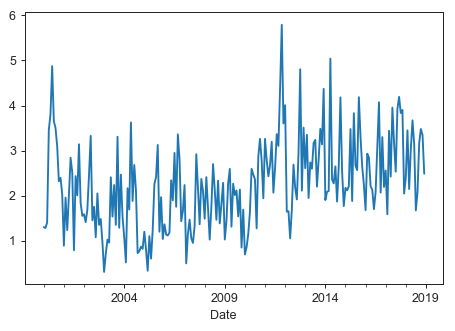

In [287]:
noaa_tim_monthly.OvrLkPrecp.plot()

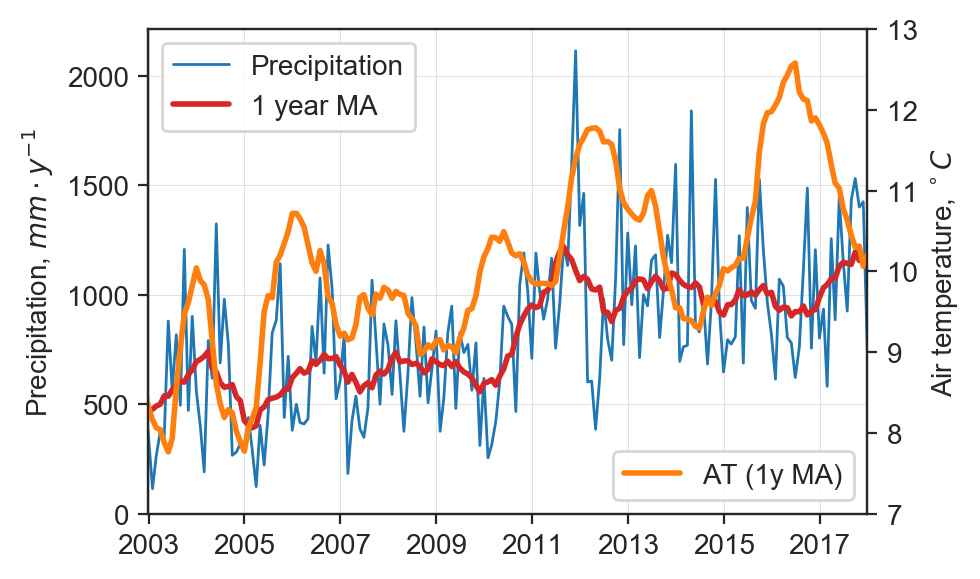

In [288]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365, lw=1, ls='-', label='Precipitation',c=sns.color_palette()[0])
# axes.plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes.plot(noaa_tim_monthly.OvrLkPrecp.index, 365*movingaverage(noaa_tim_monthly.OvrLkPrecp, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


ax2 = axes.twinx()
# ax2.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkATAvg), lw=0.5, ls='-', label='Air temperature',c=sns.color_palette()[2])
ax2.plot(noaa_tim_monthly.index, movingaverage(noaa_tim_monthly.OvrLkATAvg,12), lw=2, ls='-', label='AT (1y MA)',c=sns.color_palette()[1])
ax2.set_ylim(7,13)
ax2.set_ylabel('Air temperature, $^\circ C$')
ax2.legend(loc=4)


# axes.plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes.plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes.plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes.axhline(y=0, c='k', ls='-.', lw=0.3)




axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=2)
axes.set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()
axes.set_xlabel('')
axes.grid(lw=0.2)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precipitation_recent.pdf')

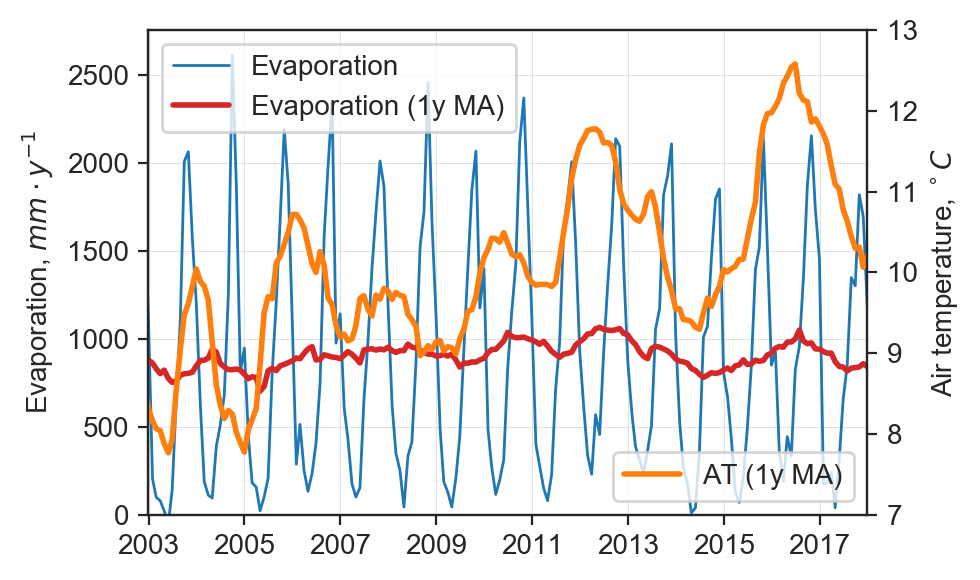

In [289]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly[' Evaporatn'])*365, lw=1, ls='-', label='Evaporation',c=sns.color_palette()[0])
# axes.plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes.plot(noaa_tim_monthly.OvrLkPrecp.index, 365*movingaverage(noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='Evaporation (1y MA)')

ax2 = axes.twinx()
# ax2.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkATAvg), lw=0.5, ls='-', label='Air temperature',c=sns.color_palette()[2])
ax2.plot(noaa_tim_monthly.index, movingaverage(noaa_tim_monthly.OvrLkATAvg,12), lw=2, ls='-', label='AT (1y MA)',c=sns.color_palette()[1])
ax2.set_ylim(7,13)
ax2.set_ylabel('Air temperature, $^\circ C$')
ax2.legend(loc=4)


axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=2)
axes.set_ylabel('Evaporation, $mm\cdot y^{-1}$')


handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/evap_recent.pdf')






In [290]:
gauged_area = 0.75

In [291]:
runoff = (runoff_ca+us_monthly)/gauged_area

In [292]:
runoff = runoff.to_frame()

In [293]:
runoff.index = pd.to_datetime(runoff.index, errors='coerce')

In [294]:
runoff['month'] = runoff.index.month
runoff['year'] = runoff.index.year
runoff['till2010'] = (runoff.index.year < 2011)

In [295]:
runoff = runoff.rename(index=str, columns={0: 'Runoff'})

In [296]:
runoff['Runoff'] = pd.to_numeric(runoff['Runoff'], errors='coerce')

In [297]:
runoff[runoff['till2010']].describe()['Runoff'].loc['mean']

855.0439887637935

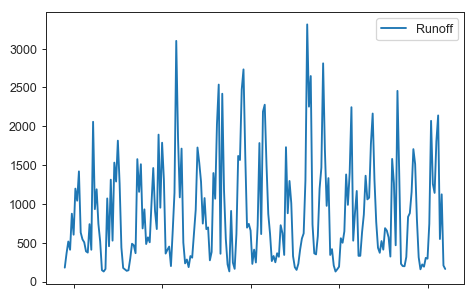

In [298]:
runoff.plot(y=0)

In [299]:
sum(1/12*runoff_av[runoff_av.till2010][0])/sum(1/12*runoff_av[~runoff_av.till2010][0])

KeyError: 0

In [300]:
noaa_tim_monthly

,OvrLkRunof,OvrLkPrecp,Evaporatn,OvrLdRunof,OvrLkATAvg
Date,,,,,
2000-01-31,1.410323,1.305484,1.641290,0.591613,-2.061613
2000-02-29,2.332414,1.283793,0.564828,0.978276,-0.442069
2000-03-31,1.674839,1.406774,0.353226,0.701613,3.018387
2000-04-30,3.483667,3.457333,0.611000,1.461667,6.195667
2000-05-31,2.759032,3.804516,0.821290,1.156774,13.419032
2000-06-30,2.818333,4.872667,1.322667,1.181333,18.827333
2000-07-31,1.132258,3.652903,2.772581,0.475806,21.717742
2000-08-31,1.106452,3.505161,3.661935,0.463871,22.619032
2000-09-30,1.588333,3.099000,6.789000,0.666000,19.958667


In [301]:
noaa_tim_monthly['month'] = noaa_tim_monthly.index.month
noaa_tim_monthly['year'] = noaa_tim_monthly.index.year
noaa_tim_monthly['till2010'] = (noaa_tim_monthly.index.year < 2011)

In [302]:
noaa_tim_monthly.groupby(['till2010']).describe()

Evaporatn                                                           \
              count      mean       std    min       25%       50%       75%   
till2010                                                                       
False          96.0  2.478143  1.761817  0.027  0.899677  2.316935  3.982605   
True          132.0  2.483095  2.013778 -0.150  0.674677  1.834194  3.875242   

                   OvrLdRunof                                          \
               max      count      mean       std       min       25%   
till2010                                                                
False     5.897097       96.0  0.519027  0.326606  0.083871  0.260565   
True      7.177419      132.0  0.621026  0.368260  0.080645  0.316298   

                                       OvrLkATAvg                       \
               50%       75%       max      count       mean       std   
till2010                                                                 
False     0.443710  0.691895  1.623871       96.0  10.767768  8.872535   
True      0.559677  0.919194  1.557857      132.0   9.723180  9.261597   

                                                               OvrLkPrecp  \
                min       25%        50%        75%        max      count   
till2010                                                                    
False     -6.130000  2.510323  10.972349  19.314833  24.800968       96.0   
True     -10.783548  1.622097   9.553478  18.673417  24.158065      132.0   

                                                                      \
              mean       std       min       25%       50%       75%   
till2010                                                               
False     2.831735  0.865864  1.055333  2.145242  2.659575  3.354113   
True      1.839703  0.835404  0.311935  1.202339  1.716500  2.367438   

                   OvrLkRunof                                          \
               max      count      mean       std       min       25%   
till2010                                                                
False     5.789333       96.0  1.238083  0.779047  0.198710  0.623212   
True      4.872667      132.0  1.481476  0.878353  0.192903  0.754581   

                                        month                                 \
               50%       75%       max  count mean       std  min   25%  50%   
till2010                                                                       
False     1.058710  1.649855  3.874194   96.0  6.5  3.470174  1.0  3.75  6.5   
True      1.334839  2.191048  3.716786  132.0  6.5  3.465203  1.0  3.75  6.5   

                       year                                             \
           75%   max  count    mean       std     min      25%     50%   
till2010                                                                 
False     9.25  12.0   96.0  2014.5  2.303316  2011.0  2012.75  2014.5   
True      9.25  12.0  132.0  2005.0  3.174324  2000.0  2002.00  2005.0   

                           
              75%     max  
till2010                   
False     2016.25  2018.0  
True      2008.00  2010.0

In [303]:
2.831735/1.839703

1.539234865627767

In [304]:
runoff

,Runoff,month,year,till2010
1996-01-31 00:00:00,NaN,1,1996,True
1996-02-29 00:00:00,NaN,2,1996,True
1996-03-31 00:00:00,NaN,3,1996,True
1996-04-30 00:00:00,NaN,4,1996,True
1996-05-31 00:00:00,NaN,5,1996,True
1996-06-30 00:00:00,NaN,6,1996,True
1996-07-31 00:00:00,NaN,7,1996,True
1996-08-31 00:00:00,NaN,8,1996,True
1996-09-30 00:00:00,NaN,9,1996,True
1996-10-31 00:00:00,NaN,10,1996,True


In [305]:
runoff_av

Runoff  month    year  till2010
till2010                                         
False    1   1180.951451    1.0  2014.5     False
         2   1010.645025    2.0  2014.5     False
         3   1749.136184    3.0  2014.5     False
         4   1655.945955    4.0  2014.5     False
         5   1187.046564    5.0  2014.5     False
         6    843.953233    6.0  2014.5     False
         7    680.403665    7.0  2014.5     False
         8    265.993797    8.0  2014.5     False
         9    311.241196    9.0  2014.5     False
         10   549.752758   10.0  2014.5     False
         11   687.311221   11.0  2014.5     False
         12  1175.134400   12.0  2014.0     False
True     1   1442.002064    1.0  2006.5      True
         2   1222.658197    2.0  2006.5      True
         3   1874.571404    3.0  2006.5      True
         4   1217.455111    4.0  2006.5      True
         5   1035.309188    5.0  2006.5      True
         6    687.242531    6.0  2006.5      True
         7    455.599159    7.0  2006.5      True
         8    374.759276    8.0  2006.5      True
         9    347.249094    9.0  2006.5      True
         10   426.032123   10.0  2006.5      True
         11   673.799356   11.0  2006.5      True
         12  1279.183006   12.0  2006.5      True

Text(0,0.5,'Runoff, $mm\\cdot month^{-1}$')

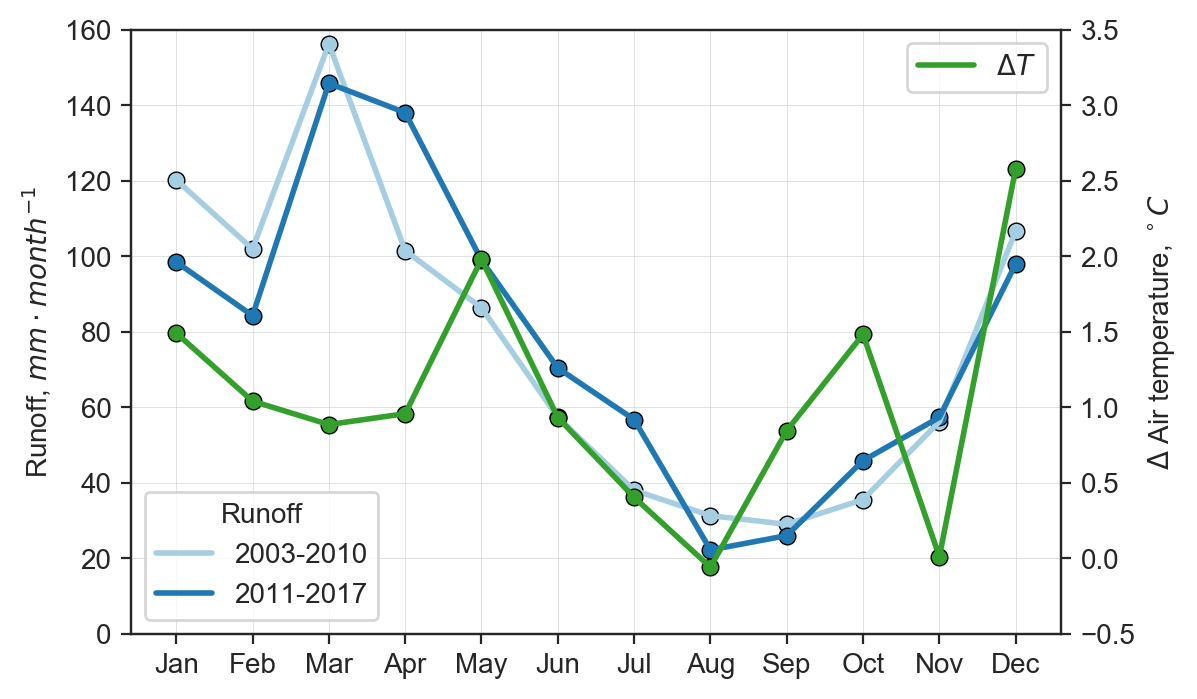

In [306]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=3,markerfacecolor=sns.color_palette()[3])

f, ax = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
# sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff, linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, showmeans=False)
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(0,11,12), [m[:3] for m in months])
ax.plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0],lw=2)
ax.plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1],lw=2)
ax.scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0], edgecolors='k',lw=0.5)
ax.scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1], edgecolors='k',lw=0.5)

ax2 = ax.twinx()
ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, 
         lw=2, ls='-',c=sns.color_palette("Paired", 6)[3], label='$\delta T$')
# ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, lw=1, ls='-', c=sns.color_palette("Paired", 6)[3], label='2011')
ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3], edgecolors='k',lw=0.5)
# ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3],)
ax2.set_ylim(-0.5,3.5)
ax2.set_ylabel('$\Delta$ Air temperature, $^\circ C$')
ax2.legend(['$\Delta T$'],loc=1)
# ax2.set_ylim(-10,25)

# ax.set_ylim(0,None)
# ax.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# ax.legend(loc=1)
# ax.set_ylabel('Evaporation, $mm\cdot y^{-1}$')


ax.set_ylim(0,160)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['2003-2010', '2011-2017'], title="Runoff", loc=3)
ax.grid(lw=0.2)
ax.set_xlabel('')
ax.set_ylabel('Runoff, $mm\cdot month^{-1}$')

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_lineplot_dT_recent.pdf')


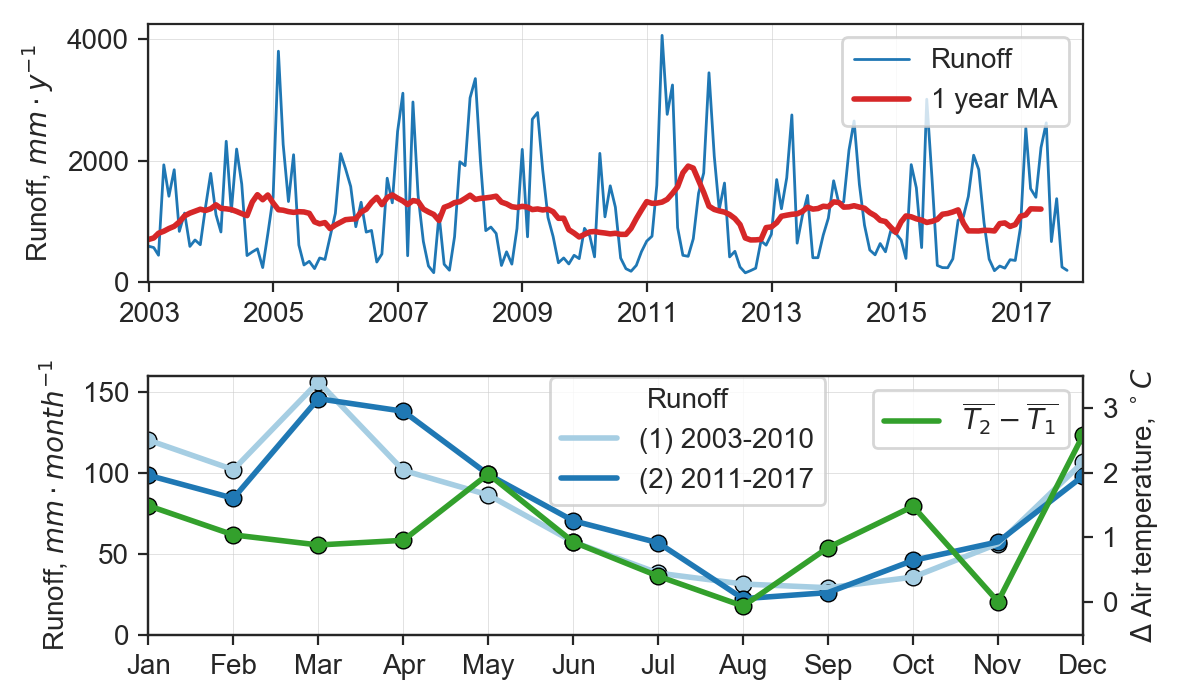

In [339]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=3,markerfacecolor=sns.color_palette()[3])

f, axes = plt.subplots(2,1, figsize=(6,3.6), dpi=200, sharex=False)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
# sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff, linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, showmeans=False)
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']

axes[1].plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0],lw=2)
axes[1].plot(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1],lw=2)
axes[1].scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[0], edgecolors='k',lw=0.5)
axes[1].scatter(runoff_av[runoff_av.till2010].month-1, 1/12*runoff_av[~runoff_av.till2010]['Runoff'], c=sns.color_palette("Paired", 6)[1], edgecolors='k',lw=0.5)

ax2 = axes[1].twinx()
ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, 
         lw=2, ls='-',c=sns.color_palette("Paired", 6)[3], label='$\delta T$')
# ax2.plot(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, lw=1, ls='-', c=sns.color_palette("Paired", 6)[3], label='2011')
ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg - noaa_tim_monthly[noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3], edgecolors='k',lw=0.5)
# ax2.scatter(np.linspace(0,11,12), noaa_tim_monthly[~noaa_tim_monthly['till2010']].groupby(['month']).mean().OvrLkATAvg, c=sns.color_palette("Paired", 6)[3],)
ax2.set_ylim(-0.5,3.5)
ax2.set_ylabel('$\Delta$ Air temperature, $^\circ C$')
ax2.legend(['$\overline{T_2} - \overline{T_1}$'],loc=1)
# ax2.set_ylim(-10,25)

# axes[1].set_ylim(0,None)
# axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(loc=1)
# axes[1].set_ylabel('Evaporation, $mm\cdot y^{-1}$')


axes[1].set_ylim(0,160)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=['(1) 2003-2010', '(2) 2011-2017'], title="Runoff", loc=(0.43,0.5))
axes[1].grid(lw=0.2)
axes[1].set_xlabel('')
axes[1].set_ylabel('Runoff, $mm\cdot month^{-1}$')

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_lineplot_dT_recent.pdf')

axes[0].plot((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/gauged_area, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
# axes[0].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes[0].plot((runoff_ca+us_monthly).index, movingaverage((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/0.75, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(0,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(loc=1)
axes[0].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()
axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes[1].set_xticks(np.linspace(0,11,12), )
axes[1].set_xticklabels([m[:3] for m in months])
axes[1].set_xlim(0,11)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_combo_recent.pdf')


In [220]:
runoff.index = pd.to_datetime(runoff.index, errors='coerce')

runoff = runoff[runoff.index.year>2002]
runoff_av = runoff[runoff.index.year>2002].groupby([runoff[runoff.index.year>2002].till2010, runoff[runoff.index.year>2002].index.month]).mean()


Text(0,0.5,'Runoff, $mm\\cdot y^{-1}$')

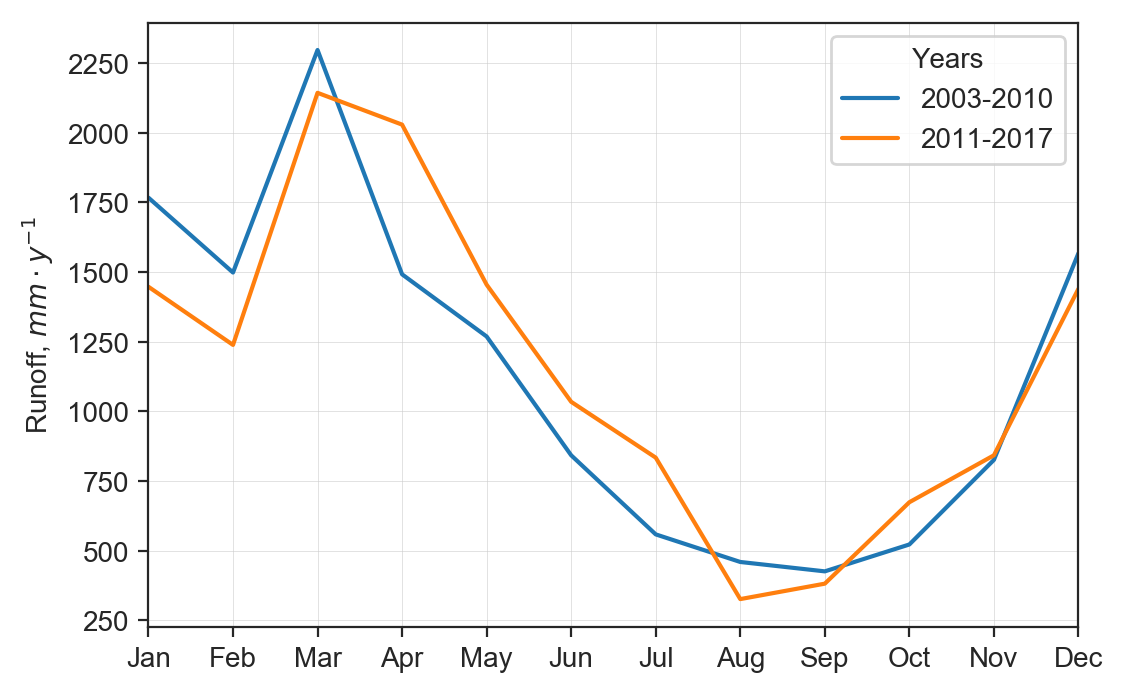

In [95]:
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])

f, ax = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# for yr,c in zip([str(int(y)) for y in np.linspace(2003,2017,15)], sns.color_palette("RdBu_r", 15)):
ax.plot(runoff_av[runoff_av.till2010].month-1, runoff_av[runoff_av.till2010][0])
ax.plot(runoff_av[runoff_av.till2010].month-1, runoff_av[~runoff_av.till2010][0])
# ax=sns.boxplot(x='month', y=0 , hue='till2010', meanprops=meanpointprops,data=runoff[runoff.index.year>2002], linewidth=0.5, color=sns.color_palette("Paired", 6)[0], fliersize=0, )
months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
plt.xticks(np.linspace(0,11,12), [m[:3] for m in months])
plt.xlim(0,11)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['2003-2010', '2011-2017'], title="Years", loc=1)
ax.grid(lw=0.2)
ax.set_xlabel('')
ax.set_ylabel('Runoff, $mm\cdot y^{-1}$')

In [24]:
runoff

1996-01-31            NaN
1996-02-29            NaN
1996-03-31            NaN
1996-04-30            NaN
1996-05-31            NaN
1996-06-30            NaN
1996-07-31            NaN
1996-08-31            NaN
1996-09-30            NaN
1996-10-31            NaN
1996-11-30            NaN
1996-12-31            NaN
1997-01-31            NaN
1997-02-28            NaN
1997-03-31            NaN
1997-04-30            NaN
1997-05-31            NaN
1997-06-30            NaN
1997-07-31            NaN
1997-08-31            NaN
1997-09-30            NaN
1997-10-31            NaN
1997-11-30            NaN
1997-12-31            NaN
1998-01-31            NaN
1998-02-28            NaN
1998-03-31            NaN
1998-04-30            NaN
1998-05-31            NaN
1998-06-30            NaN
1998-07-31            NaN
1998-08-31            NaN
1998-09-30            NaN
1998-10-31            NaN
1998-11-30            NaN
1998-12-31            NaN
1999-01-31            NaN
1999-02-28            NaN
1999-03-31  

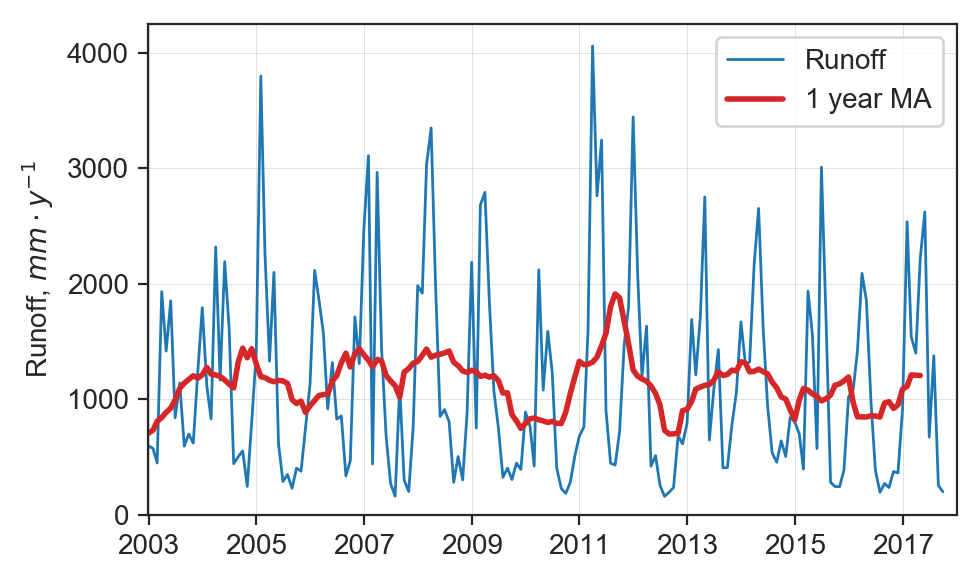

In [57]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkRunof+noaa_tim_monthly.OvrLdRunof)*365, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
axes.plot((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/gauged_area, lw=1, ls='-', label='Runoff',c=sns.color_palette()[0])
# axes.plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
# axes.plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[3])
axes.plot((runoff_ca+us_monthly).index, movingaverage((runoff_ca+us_monthly)/conversion_fac_mmy_to_cms/0.75, 12), c=sns.color_palette()[3], lw=2, label='1 year MA')


# axes.plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(),lw=0.9, c=sns.color_palette()[0], label='US rivers')
# axes.plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), lw=0.9,c=sns.color_palette()[3], label='CA rivers')

# axes.plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes.axhline(y=0, c='k', ls='-.', lw=0.3)

axes.set_ylim(0,None)
axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=1)
axes.set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()
axes.set_xlabel('')
axes.grid(lw=0.2)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/runoff_recent.pdf')




In [20]:
# canadian_rivers.columns

# us_monthly.columns

us_monthly = us_rivers.groupby(pd.Grouper(freq='M')).mean()

cr_monthly = canadian_rivers.groupby(pd.Grouper(freq='M')).mean()

runoff_ca = cr_monthly.sum(axis=1) - cr_monthly['Niagara_R'] - cr_monthly['St_Clair_R']

us_monthly = us_monthly.sum(axis=1) - us_monthly['Detroit_R']

noaa_tim_yearly[3:-1].T*365*conversion_fac_mmy_to_cms_eastern

Date,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
OvrLkRunof,123.418525,104.155646,104.129861,105.288978,108.417935,135.340063,112.892256,79.514520,152.264970,84.351542,103.174521,79.080673,65.412300,75.827233,114.428250
OvrLkPrecp,127.824921,127.108565,115.451516,153.925859,131.536723,150.078966,141.916185,159.664472,262.045798,202.068290,237.338429,209.458279,221.656393,201.421483,251.173329
Evaporatn,166.816375,184.171831,182.905965,193.868271,206.574730,208.059999,189.711666,222.592012,196.657601,230.016485,209.988537,171.465988,188.219495,230.154150,179.676214
OvrLdRunof,51.748310,43.670420,43.636685,44.145031,45.442190,56.724565,47.304665,33.353634,63.836866,35.358072,43.246661,33.147666,27.446303,31.772225,47.970773
OvrLkATAvg,690.485081,657.518980,778.457426,825.965868,770.790604,748.576778,748.432144,823.312389,819.677277,931.146886,869.968474,766.449943,860.509294,979.535067,854.498979


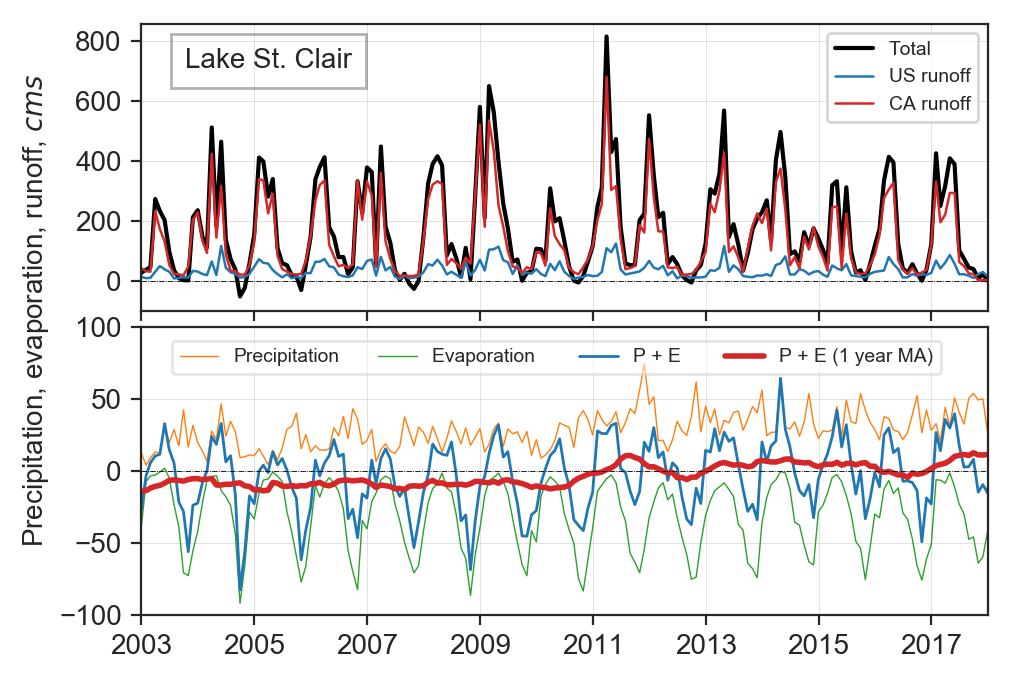

In [342]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(pd.concat([us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,
    canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,
    (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair], axis=1).sum(axis=1) , lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-100,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_st_clair, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_st_clair*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)


axes[0].text(0.15, 0.87,'Lake St. Clair',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))


axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical', )


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-100,100)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.12)
plt.gcf().subplots_adjust(left=0.12)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_st_clair.pdf', dpi=f.dpi)

In [363]:
total_eastern = us_rivers[rivers['us']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + canadian_rivers[rivers['ca']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern
#  +
# 

# Eastern 

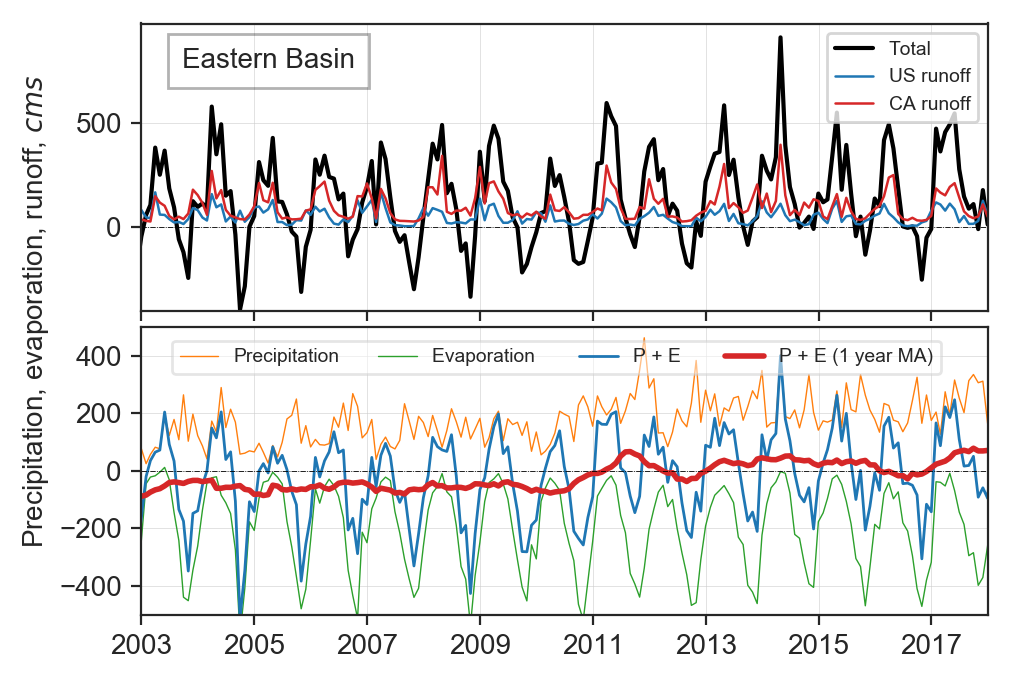

In [364]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(total_eastern, lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['eastern']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-400,None)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_eastern, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_eastern, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_eastern*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)
axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].text(0.15, 0.87,'Eastern Basin',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))

axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical', )


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-500,500)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.1)
plt.gcf().subplots_adjust(left=0.12)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_eastern.pdf', dpi=f.dpi)



# Central

In [365]:
total_central = us_rivers[rivers['us']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
canadian_rivers[rivers['ca']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central
#  +
# 

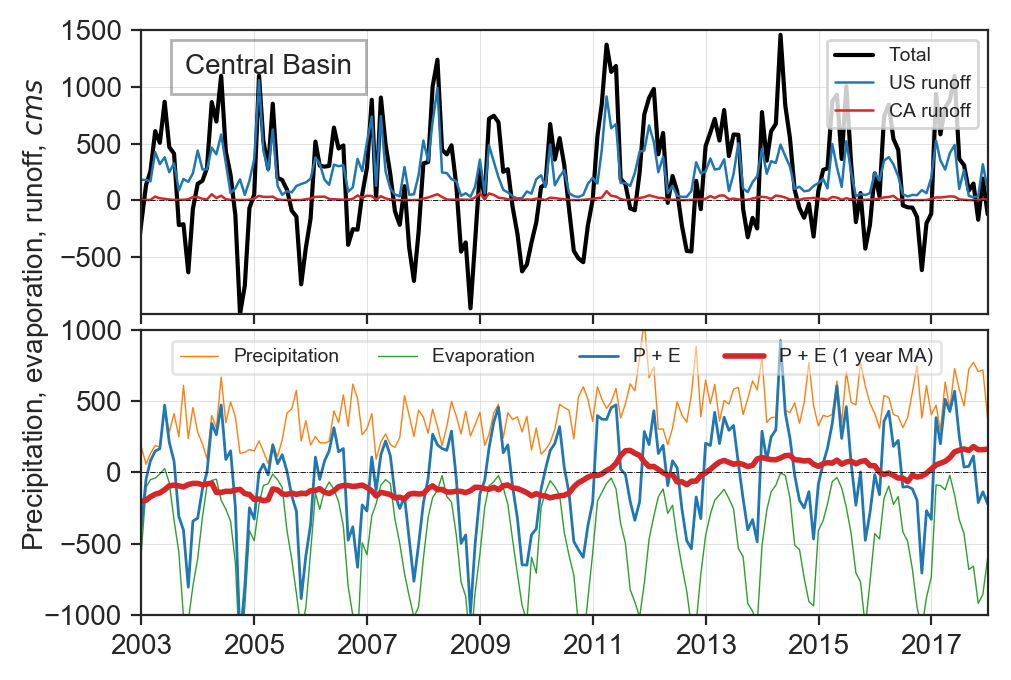

In [366]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(total_central, lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['central']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-1000,1500)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes[0].set_yticks(np.linspace(-500,1500, 5))


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_central, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_central, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_central*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)
axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)



axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical', )

axes[0].text(0.15, 0.87,'Central Basin',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))

handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-1000,1000)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.1)
plt.gcf().subplots_adjust(left=0.12)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_central.pdf', dpi=f.dpi)



# Western 

In [292]:
total_western = us_rivers[rivers['us']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
canadian_rivers[rivers['ca']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area + \
(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western
#  +
# 

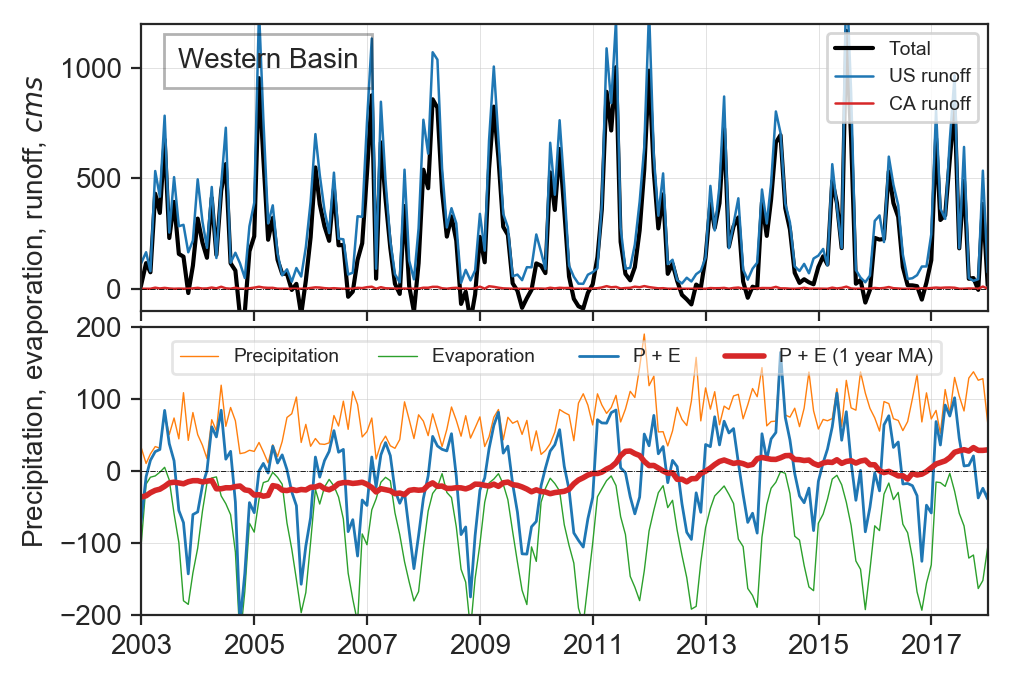

In [367]:
f, axes = plt.subplots(2,1, figsize=(5,3.5), dpi=200, sharex=True)


axes[0].plot(total_western, lw=1.5, c='k', label='Total')
axes[0].plot(us_rivers[rivers['us']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area,lw=0.9, c=sns.color_palette()[0], label='US runoff')
axes[0].plot(canadian_rivers[rivers['ca']['western']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean()/gauged_area, lw=0.9,c=sns.color_palette()[3], label='CA runoff')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

# axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)

axes[0].set_ylim(-100,1200)
axes[0].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes[0].legend(fontsize='x-small', loc=1)
# axes[0].set_ylabel('Runoff, $cms$')

axes[0].set_xlabel('')
axes[0].grid(lw=0.2)

axes


# axes[0].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western, lw=1, label='Precipitation (GLERL)')

axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp)*365*conversion_fac_mmy_to_cms_western, lw=0.5, ls='-', label='Precipitation',c=sns.color_palette()[1])
axes[1].plot(noaa_tim_monthly.index, -(noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western, lw=0.5, ls='-', label='Evaporation ',c=sns.color_palette()[2])
axes[1].plot(noaa_tim_monthly.index, (noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'])*365*conversion_fac_mmy_to_cms_western, lw=1, label='P + E ',c=sns.color_palette()[0])
axes[1].plot(noaa_tim_monthly.OvrLkPrecp.index, 365*conversion_fac_mmy_to_cms_western*movingaverage(noaa_tim_monthly.OvrLkPrecp - noaa_tim_monthly[' Evaporatn'], 12), c=sns.color_palette()[3], lw=2, label='P + E (1 year MA)')

# axes[0].plot(us_rivers[rivers['us']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[0], label='US rivers')
# axes[0].plot(canadian_rivers[rivers['ca']['clair']].sum(axis=1).groupby(pd.Grouper(freq='M')).mean(), c=sns.color_palette()[3], label='CA rivers')

# axes[0].plot(noaa_tim_monthly.index, noaa_tim_monthly[' Evaporatn']*365, lw=0.3,label='Precipitation (GLERL)', c=sns.color_palette()[2])

axes[1].axhline(y=0, c='k', ls='-.', lw=0.3)
axes[0].axhline(y=0, c='k', ls='-.', lw=0.3)


axes[0].text(-0.125,0.,'Precipitation, evaporation, runoff, $cms$',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes,
                rotation='vertical')

axes[0].text(0.15, 0.87,'Western Basin',  horizontalalignment='center', 
             verticalalignment='center', transform=axes[0].transAxes, 
             bbox=dict(facecolor='none', edgecolor='k', pad=5, alpha=0.3))

handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles, labels, loc = (0.17, 0.45), ncol=4, frameon=1, framealpha=0.5, fontsize='x-small' )

axes[1].set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes[1].legend(fontsize='x-small', loc=4)
axes[1].set_ylim(-200,200)
axes[1].set_xlabel('')
axes[1].grid(lw=0.2)
plt.tight_layout(h_pad=0.1)
plt.gcf().subplots_adjust(left=0.12)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_balance_western.pdf', dpi=f.dpi)

